# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [30]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.utils import resample

In [17]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

(912597, 8)
(87403, 8)


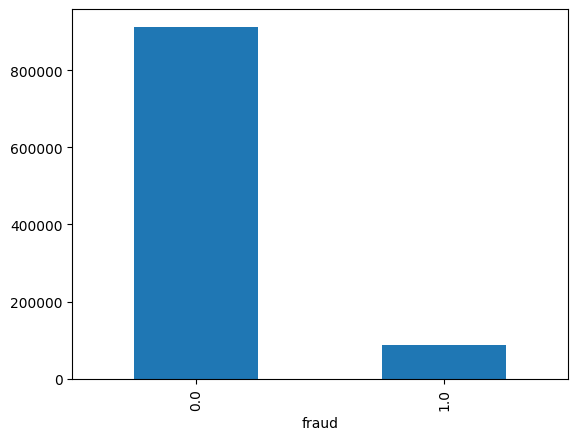

In [18]:
# **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

print(fraud[fraud['fraud'] == 0].shape)
print(fraud[fraud['fraud'] == 1].shape)

fraud_counts = fraud["fraud"].value_counts()
fraud_counts.plot(kind="bar")
plt.show()

# We are dealing with an imbalance dataset because shape of no fraud rows is 912597 and fraud rows is 87403 and we can she in the plot

In [19]:
 # **2.** Train a LogisticRegression.

X = fraud.drop(columns = ["fraud"])
y = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
log_reg.score(X_test_scaled, y_test)

0.958644

In [31]:
# **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
pred = log_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", log_reg.score(X_test_scaled, y_test))

MAE 0.041356
RMSE 0.2033617466486753
R2 score 0.958644


/Users/joaquinalborszamorano/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
# **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. 
# Does it improve the performance of our model? NO
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
yes_fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [73]:
yes_fraud_oversampled = resample(yes_fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [75]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31575,8.442783,-0.095787,-0.339715,0.366944,-0.734481,-0.334406,0.732647,1.0
498993,-0.369689,-0.222737,0.940440,0.366944,1.361505,-0.334406,0.732647,1.0
487542,-0.350408,-0.137901,1.530563,0.366944,1.361505,-0.334406,0.732647,1.0
601214,0.219269,3.565503,-0.482499,0.366944,-0.734481,-0.334406,0.732647,1.0
525986,0.612553,-0.210186,13.257982,0.366944,-0.734481,-0.334406,0.732647,1.0
...,...,...,...,...,...,...,...,...
749995,-0.259534,-0.125084,0.877624,0.366944,1.361505,-0.334406,-1.364913,0.0
749996,-0.150413,0.138702,0.797538,0.366944,-0.734481,2.990374,-1.364913,0.0
749997,0.852646,-0.099060,0.235655,0.366944,1.361505,-0.334406,0.732647,0.0
749998,-0.134174,-0.216115,-0.471486,0.366944,1.361505,-0.334406,0.732647,0.0


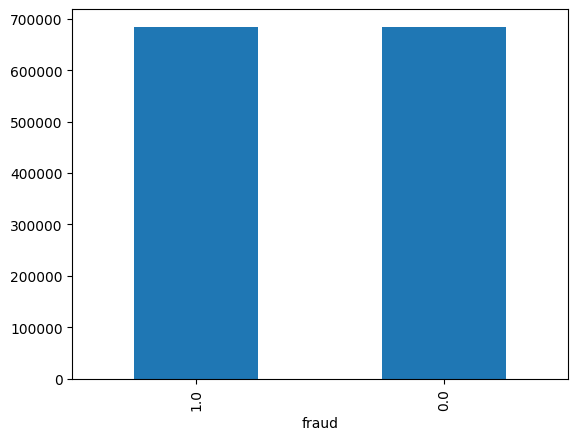

In [76]:
train_over_plt = train_over["fraud"].value_counts()
train_over_plt.plot(kind="bar")
plt.show()

In [77]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [78]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [79]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/joaquinalborszamorano/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228092
         1.0       0.58      0.95      0.72     21908

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [86]:
# **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. 
# Does it improve the performance of our model? NO, same result

no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(yes_fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
45833,-0.348644,-0.187668,0.493391,0.366944,-0.734481,-0.334406,0.732647,0.0
714246,-0.166860,-0.210458,-0.502845,0.366944,1.361505,-0.334406,-1.364913,0.0
176863,-0.378319,3.805367,-0.635725,0.366944,1.361505,2.990374,0.732647,0.0
705283,0.020425,0.012746,-0.449939,0.366944,1.361505,-0.334406,0.732647,0.0
143665,-0.399278,1.290366,-0.560924,-2.725211,-0.734481,-0.334406,-1.364913,0.0
...,...,...,...,...,...,...,...,...
148377,-0.169391,-0.202632,-0.480709,0.366944,1.361505,-0.334406,0.732647,0.0
25341,-0.328618,-0.222018,-0.587536,0.366944,1.361505,-0.334406,0.732647,0.0
746970,-0.392964,-0.104959,-0.460683,-2.725211,1.361505,2.990374,0.732647,0.0
30854,-0.283162,0.368831,-0.302010,0.366944,-0.734481,-0.334406,0.732647,0.0


In [81]:
train_under = pd.concat([no_fraud_undersampled, yes_fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
45833,-0.348644,-0.187668,0.493391,0.366944,-0.734481,-0.334406,0.732647,0.0
714246,-0.166860,-0.210458,-0.502845,0.366944,1.361505,-0.334406,-1.364913,0.0
176863,-0.378319,3.805367,-0.635725,0.366944,1.361505,2.990374,0.732647,0.0
705283,0.020425,0.012746,-0.449939,0.366944,1.361505,-0.334406,0.732647,0.0
143665,-0.399278,1.290366,-0.560924,-2.725211,-0.734481,-0.334406,-1.364913,0.0
...,...,...,...,...,...,...,...,...
749912,5.415256,-0.067385,-0.172451,0.366944,-0.734481,-0.334406,0.732647,1.0
749923,0.353700,-0.104198,1.259601,0.366944,-0.734481,-0.334406,0.732647,1.0
749939,-0.019190,-0.137386,2.535867,0.366944,1.361505,-0.334406,0.732647,1.0
749944,0.026783,-0.089057,3.548720,0.366944,-0.734481,-0.334406,0.732647,1.0


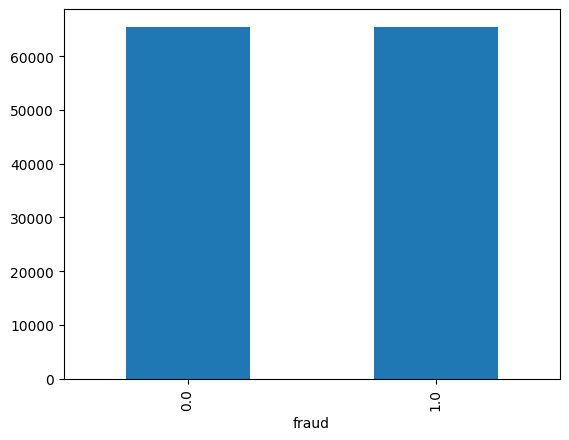

In [82]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [83]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [84]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [85]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/joaquinalborszamorano/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228092
         1.0       0.58      0.95      0.72     21908

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [92]:
# **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. 
# Does it improve the performance of our model? NO, same result

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [93]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [94]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228092
         1.0       0.58      0.95      0.72     21908

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

